<a href="https://colab.research.google.com/github/Bradshard/miscCodes/blob/main/SIRDBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[9.999e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00]
[9.99900012e+03 1.00000304e+00 1.82215029e-06 2.42953373e-07
 1.21464539e-04]
[9.99900012e+03 1.00000304e+00 1.82215564e-06 2.42954110e-07
 1.21464540e-04]
[9.99900023e+03 1.00000607e+00 3.64431129e-06 4.85908221e-07
 2.42929080e-04]
[9.99900023e+03 1.00000607e+00 3.64431663e-06 4.85908958e-07
 2.42929082e-04]
[9.99918425e+03 1.00482005e+00 2.89221620e-03 3.85659665e-04
 1.92349874e-01]
[9.99918425e+03 1.00482007e+00 2.89223238e-03 3.85661894e-04
 1.92349874e-01]
[9.99936824e+03 1.00965733e+00 5.79423136e-03 7.72687663e-04
 3.84460354e-01]
[9.99936824e+03 1.00965739e+00 5.79426380e-03 7.72692132e-04
 3.84460354e-01]
[9.99955218e+03 1.01451808e+00 8.70977122e-03 1.16158112e-03
 5.76574368e-01]
[9.99955218e+03 1.01451814e+00 8.70980382e-03 1.16158561e-03
 5.76574368e-01]
[1.00003143e+04 1.03491894e+00 2.09406012e-02 2.79366747e-03
 1.37297093e+00]
[1.00003143e+04 1.03491937e+00 2.09408446e-02 2.79370100e-03
 1.37297092e+00]
[1.00001141e

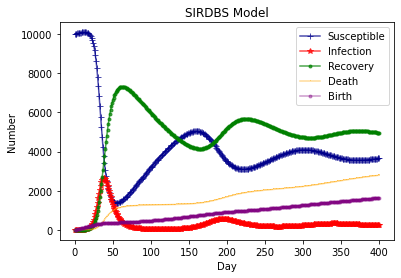

In [1]:

import scipy.integrate as sp
import numpy as np
import matplotlib.pyplot as plt

# N is the total number of people
N = 10000
# β is the infection rate coefficient
beta = 0.4
# gamma is the recovery rate coefficient
gamma = 0.15
# death chance coefficient
death = 0.02
# birth chance coefficient
birth = 0.001
# Antibody is the duration of the antibody
Antibody = 120
# I_0 is the initial number of infected people
I_0 = 1
# R_0 is the initial number of recovered people
R_0 = 0
# D_0 is the initial number of dead people
D_0 = 0
# B_0 is the initial number of birth people
B_0 = 0
# S_0 is the initial number of susceptible people
S_0 = N - I_0 - R_0 - D_0 + B_0
# T is the propagation time
Time = 400

# Initial is the array in the initial state
initial = (S_0,I_0,R_0,D_0,B_0)


def SIRS(init_value,range):
    Y = np.zeros(5)
    X = init_value
    print(X)
    # susceptible individual changes
    Y[0] = (- (beta * X[0] * X[1]) / N + X[2] / Antibody )- (X[1]*death) + (X[0] * birth)
    # Infected individual changes
    Y[1] = (beta * X[0] * X[1]) / N - gamma * X[1]
    # Recovered individual changes
    Y[2] = (gamma * X[1] - X[2] / Antibody)
    # Dead individual changes 
    Y[3] = (X[1]*death)
    # New born count change
    Y[4] = (X[0]*birth)
    return Y

Time_range = np.arange(0,Time + 1)

result = sp.odeint(SIRS,initial,Time_range) # ordinary differential equation package

# will see three peaks getting smaller as expected.
plt.plot(result[:,0],color = 'darkblue',label = 'Susceptible',marker = '+',alpha = 0.7)
plt.plot(result[:,1],color = 'red',label = 'Infection',marker = '*',alpha = 0.7)
plt.plot(result[:,2],color = 'green',label = 'Recovery',marker = '.',alpha = 0.7)
plt.plot(result[:,3],color = 'orange',label = 'Death',marker = ',',alpha = 0.4)
plt.plot(result[:,4],color = 'purple',label = 'Birth',marker = '.',alpha = 0.4)
plt.title('SIRDBS Model') # included death and birth but no weights given only deterministic.
plt.legend(loc = "upper right")
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()